In [30]:
#Import Library
import matplotlib.pyplot as plt
import IPython.display as ipd
import os
import numpy as np
import glob
import pandas as pd
import librosa

In [31]:
#Print list of audio files
for file in os.listdir('dataverse_files/'):
    print(file)

OAF_back_angry.wav
OAF_back_disgust.wav
OAF_back_happy.wav
OAF_back_neutral.wav
OAF_back_sad.wav
OAF_bar_angry.wav
OAF_bar_disgust.wav
OAF_bar_happy.wav
OAF_bar_neutral.wav
OAF_bar_sad.wav
OAF_base_angry.wav
OAF_base_disgust.wav
OAF_base_happy.wav
OAF_base_neutral.wav
OAF_base_sad.wav
OAF_bath_angry.wav
OAF_bath_disgust.wav
OAF_bath_happy.wav
OAF_bath_neutral.wav
OAF_bath_sad.wav
OAF_bean_angry.wav
OAF_bean_disgust.wav
OAF_bean_happy.wav
OAF_bean_neutral.wav
OAF_bean_sad.wav
OAF_beg_angry.wav
OAF_beg_disgust.wav
OAF_beg_happy.wav
OAF_beg_neutral.wav
OAF_beg_sad.wav
OAF_bite_angry.wav
OAF_bite_disgust.wav
OAF_bite_happy.wav
OAF_bite_neutral.wav
OAF_bite_sad.wav
OAF_boat_angry.wav
OAF_boat_disgust.wav
OAF_boat_happy.wav
OAF_boat_neutral.wav
OAF_boat_sad.wav
OAF_bone_angry.wav
OAF_bone_disgust.wav
OAF_bone_happy.wav
OAF_bone_neutral.wav
OAF_bone_sad.wav
OAF_book_angry.wav
OAF_book_disgust.wav
OAF_book_happy.wav
OAF_book_neutral.wav
OAF_book_sad.wav
OAF_bought_angry.wav
OAF_bought_disgust.

In [32]:
ipd.Audio('dataverse_files/OAF_back_angry.wav')

In [6]:
def feature_extraction(file_path):
    # Load audio
    x, sample_rate = librosa.load(file_path)
    # Feature Extraction
    # n_mfcc parameter define the complexity of the audio
    # the higher the value of n_mfcc, the higher the complexity of the audio
    mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=13).T, axis=0)
    return mfcc

In [38]:
def waveplot(dat, sr, emotion):
    plt.figure(figsize=(5, 2))
    plt.title(emotion, size=20)
    librosa.display.waveshow(dat, sr=sr)
    plt.show()

def spectogram(dat, sr, emotion):
    x = librosa.stft(dat)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(5, 2))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

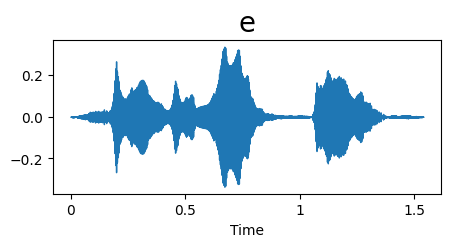

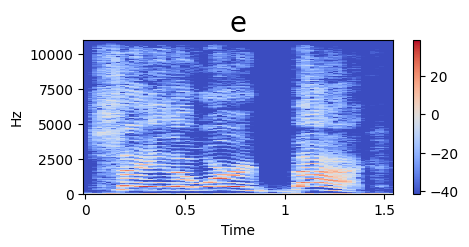

In [39]:
waveplot(signal, sr, 'e')
spectogram(signal, sr, 'e')

In [21]:
file_list = glob.glob('dataverse_files/*.wav')

emotions = []
paths = []

for file in file_list:
    # Menyimpan path file
    paths.append(file)
    # Menyimpan emosi file
    part = os.path.basename(file).split('_')
    emotions.append(part[2].split('.')[0])

# Membuat dataframe dari daftar emosi dan path file
emotion_df = pd.DataFrame(emotions, columns=['Emotions'])
path_df = pd.DataFrame(paths, columns=['Path'])

data_df = pd.concat([emotion_df, path_df], axis=1)

e_dict = {'happy': 'happy', 'sad': 'sad', 'angry': 'angry', 'neutral': 'neutral', 'disgust': 'disgust'}
data_df['Emotions'] = data_df['Emotions'].map(e_dict)

del emotion_df
del path_df

data_df.head()

,Emotions,Path
0,angry,dataverse_files\OAF_back_angry.wav
1,disgust,dataverse_files\OAF_back_disgust.wav
2,happy,dataverse_files\OAF_back_happy.wav
3,neutral,dataverse_files\OAF_back_neutral.wav
4,sad,dataverse_files\OAF_back_sad.wav


In [35]:
data_df.describe()

,Emotions,Path
count,2000,2000
unique,5,2000
top,angry,dataverse_files\OAF_back_angry.wav
freq,400,1


In [7]:
feature_extraction('dataverse_files/OAF_back_angry.wav')

array([-3.8343262e+02,  5.2460812e+01, -1.7608942e+01, -1.1810310e+01,
       -4.7076292e+00,  7.5138912e+00, -2.5082636e+01, -6.9484596e+00,
       -1.0093305e+01, -3.2549365e+00,  2.8103781e-01,  6.5669644e-01,
        2.0474987e+00], dtype=float32)

In [8]:
features = {}
dir = 'experiment/'
for audio in os.listdir(dir):
    audio_path = dir+audio
    features[audio_path] = feature_extraction(audio_path)

In [9]:
print(features[audio_path])

[-541.9306      80.05686     24.261532    11.372065    16.211912
   15.829979   -12.709271    -9.559673   -11.427237     4.257035
   -9.69252      7.6938334   -5.823311 ]


In [10]:
features[audio_path], len(features[audio_path])

(array([-541.9306   ,   80.05686  ,   24.261532 ,   11.372065 ,
          16.211912 ,   15.829979 ,  -12.709271 ,   -9.559673 ,
         -11.427237 ,    4.257035 ,   -9.69252  ,    7.6938334,
          -5.823311 ], dtype=float32),
 13)